In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.utils.np_utils import to_categorical
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
train = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv') #reading training data
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.shape

(60000, 785)

In [4]:
test = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv') #readind testing set
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.shape

(10000, 785)

In [6]:
#creating seperate train and test data that we will be normalizing and reshaping to train our model
X_train = train.drop(["label"],axis =1)
Y_train = train.label
X_test = test.drop(["label"],axis = 1)
Y_test = test.label

In [7]:
#normalizing and reshaping our data
X_train = X_train/255.0
X_test = X_test/255.0
X_train = X_train.values.reshape(-1,28,28,1) #We have images of the size 28x28 but for keras we need 3D matrices. We reshape and give channels as 1 as we will be using Grayscale images
X_test = X_test.values.reshape(-1,28,28,1)

In [8]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
#print(Y_train.shape)
#print(Y_test.shape)
Y_train = to_categorical(Y_train, num_classes = 10) #we have total 10 classes in our data so we need to one-hot encode our labels before we start training

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 42)

In [11]:
print("x_train shape",x_train.shape)
print("x_test shape",x_val.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

x_train shape (42000, 28, 28, 1)
x_test shape (18000, 28, 28, 1)
y_train shape (42000, 10)
y_test shape (18000, 10)


In [46]:
#creating our CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding = 'Same', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])

epochs = 50  
batch_size = 164

In [47]:
#data augmentation for preventing overfitting
datagen = ImageDataGenerator(  
        rotation_range=0.2,
        zoom_range = 0.2,
        horizontal_flip=True,  
        vertical_flip=False)  

In [48]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 128)        

In [49]:
datagen.fit(X_train)
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val))    

Epoch 1/50
257/257 [==============================] - 10s 38ms/step - loss: 0.9365 - accuracy: 0.6514 - val_loss: 0.5368 - val_accuracy: 0.7946
Epoch 2/50
257/257 [==============================] - 10s 37ms/step - loss: 0.6130 - accuracy: 0.7701 - val_loss: 0.4731 - val_accuracy: 0.8194
Epoch 3/50
257/257 [==============================] - 10s 39ms/step - loss: 0.5334 - accuracy: 0.8008 - val_loss: 0.3840 - val_accuracy: 0.8591
Epoch 4/50
257/257 [==============================] - 10s 41ms/step - loss: 0.4923 - accuracy: 0.8161 - val_loss: 0.3627 - val_accuracy: 0.8632
Epoch 5/50
257/257 [==============================] - 10s 37ms/step - loss: 0.4540 - accuracy: 0.8314 - val_loss: 0.3370 - val_accuracy: 0.8752
Epoch 6/50
257/257 [==============================] - 10s 39ms/step - loss: 0.4345 - accuracy: 0.8391 - val_loss: 0.3205 - val_accuracy: 0.8817
Epoch 7/50
257/257 [==============================] - 10s 37ms/step - loss: 0.4149 - accuracy: 0.8454 - val_loss: 0.3088 - val_accuracy:

Text(0.5, 0, 'epoch')

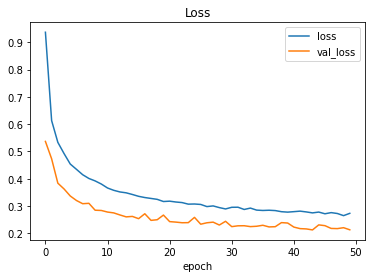

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

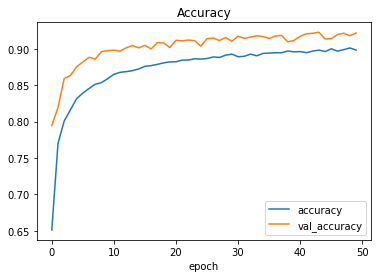

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')